# Curso BancoEstado-CMM: Aprendizaje de Máquinas Avanzado 
**Autores:** Taco de Wolff y Felipe Tobar  

**Fecha:** 18 octubre, 2019


# Módulo 4 - Contenidos
Scikit-learn:
- Data preprocessing
- - Clean up, transformation, standardization, normalization
- - Show skewed distribution and transform to symmetric distribution (Yeo-Johnson, Box-Cox)
- - Discretization of features: KBins from numeric value to category (or to binary)
- - Imputation of missing values
- - PolynomialRegression for trend or higher-order discovery
- Model selection, validation, and evaluation (metrics)
- - Train versus test set
- - Accuracy and error measures and explain what they mean
- Clustering
- - K-means, means shifts, Hierarchical clustering
- - Maybe a tutorial?
- SVM?
- Regression and classification, again?
- - SVM, ridge/lasso regression, logistic regression

## Orígenes

Scikit-learn fue desarrollado originalemnte por David Cournapeau, en un proyecto dentro del _Google summer of code_  en 2007. Luego de eso, Matthieu Brucher se unió al proyecto y siguió trabajando en él durante su trabajo de tesis. Posteriormente, INRIA se involucró en el proyecto y en 2010 se realizó el primer lanzamiento público. Actualmente el proyecto tiene más de 30 contribuyentes activos y es auspiciado por INRIA, Google, Tinyclues y Python Software Foundation.

## ¿Qué es scikit-learn?

Es un _toolbox_ de Python que provee múltiples herramietnas de aprendizaje supervisado y no spuervisado a través de una interfaz consistente con el resto del ecosistema de análisis de datos. La licencia es libre lo cual inpulsa uso académico, científico y comercial. 

Scikit-learn está construido sobre SciPy (Scientific Python) y su visión es un nivel de robustez y soporte para su uso en sistemas de producción. Consecuentemente, el foco está en facilidad de uso, calidad del código, collaboración y documentación. 

Algunas de las herramientas incluidas en scikit-learn incluyen:

Clustering.
Validación cruzada. 
Datasets.
Reducción de Dimensionalidad.
Visualization y selección de caractverísticas.
Métodos de ensemble.
Extracción y selección de caractaerísticas.
Ajuste de parámetros.
Aprendizaje sueprvisado.


## Aprendizaje de Máquinas usando Scikit-learn
![ML Map](ml_map.png)



In [ ]:
Nosotros tenemos:
- Más que 50 filas
- Prediciendo categorias
- Tenemos datos con etiquetas (nombres de las columnas)
- Menos que 100 míl datos
- Pues: **Linear SVC, Naive Bayes, K-Neighbour Classifier**

In [4]:
import pandas as pd
from sklearn import preprocessing, datasets, decomposition, cluster


import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12,6)})

## Cifras

In [102]:
from sklearn import datasets
digits = datasets.load_digits()
datasets.load_digits?

In [16]:
digits.images[1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

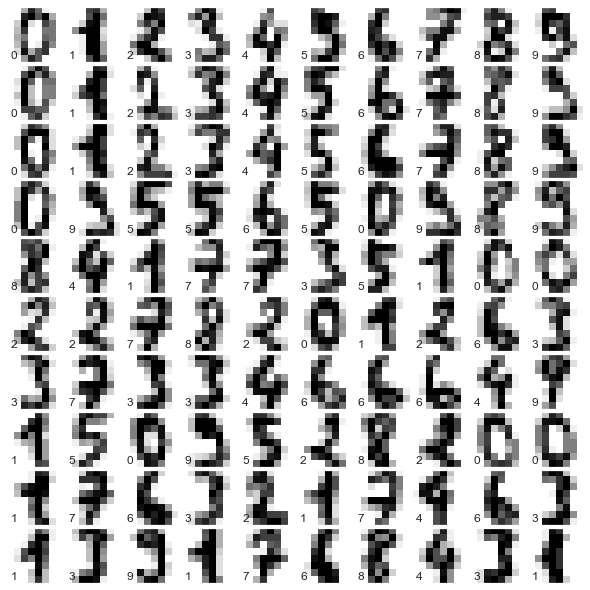

In [33]:
fig = plt.figure(figsize=(8, 8))

fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))

plt.show()

### Análisis de componentes principales

In [52]:
decomposition.PCA?

In [50]:
from sklearn import decomposition

randomized_pca = decomposition.PCA(n_components=2, svd_solver='full', whiten=True)
reduced_data_rpca = randomized_pca.fit_transform(digits.data)

# Inspect the shape
print(f'dimensión de datos originales: {digits.data.shape}')
print(f'dimensión de datos reducidos: {reduced_data_rpca.shape}')

# Print out the data
print(reduced_data_rpca.shape)
#print(reduced_data_pca)

dimensión de datos originales: (1797, 64)
dimensión de datos reducidos: (1797, 2)
(1797, 2)


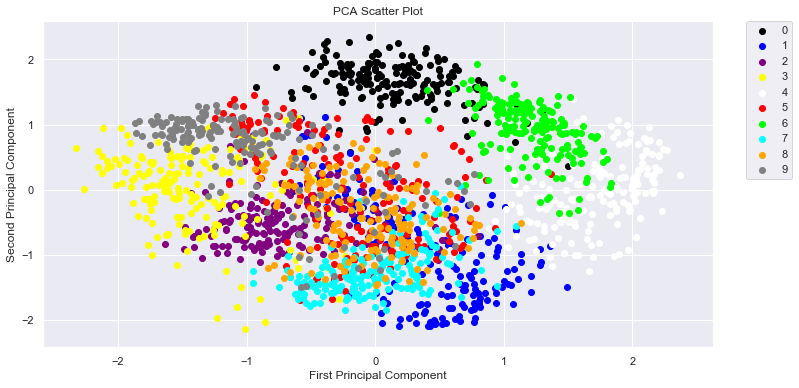

In [51]:
#ahora graficamos 

#definimos colores para cada clase
colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']

for i in range(len(colors)):
    x = reduced_data_rpca[:, 0][digits.target == i]
    y = reduced_data_rpca[:, 1][digits.target == i]
    plt.scatter(x, y, c=colors[i])
plt.legend(digits.target_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot")
plt.show()

### Clustering

In [54]:
#estandarizar primero: remover media y dividir por la desviación estándar

from sklearn.preprocessing import scale
data = scale(digits.data)

In [58]:
train_test_split?

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(data,
                                                                               digits.target,
                                                                               digits.images,
                                                                               test_size=0.25,
                                                                               random_state=42)

In [60]:
from sklearn import cluster

clf = cluster.KMeans(init='k-means++', n_clusters=10, random_state=42)
clf.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

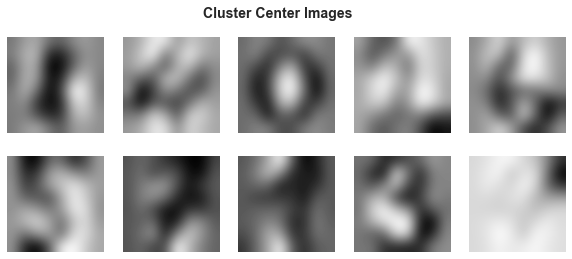

In [64]:
fig = plt.figure(figsize=(10, 4))
fig.suptitle('Cluster Center Images', fontsize=14, fontweight='bold')

# For all labels (0-9)
for i in range(10):
    # Initialize subplots in a grid of 2X5, at i+1th position
    ax = fig.add_subplot(2, 5, 1 + i)
    # Display images
    ax.imshow(clf.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary, interpolation='bicubic')
    # Don't show the axes
    plt.axis('off')

# Show the plot
plt.show()

In [72]:
# Predict the labels for `X_test`
y_pred=clf.predict(X_test)

# Print out the first 100 instances of `y_pred`
print(y_pred[:35])

# Print out the first 100 instances of `y_test`
print(y_test[:35])

# Study the shape of the cluster centers
clf.cluster_centers_.shape

[4 8 8 9 3 3 5 8 5 3 0 7 1 2 1 3 8 6 8 8 1 5 8 6 5 4 8 5 4 8 1 8 3 1 1]
[6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4]


(10, 64)

In [68]:
clf.fit_predict?

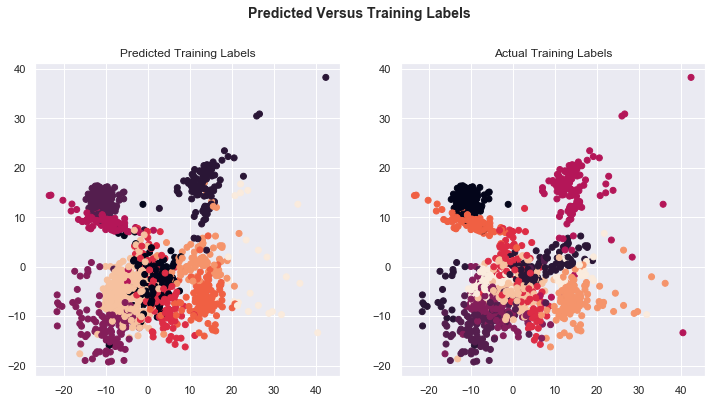

In [69]:
from sklearn.manifold import Isomap

# Create an isomap and fit the `digits` data to it
X = Isomap(n_neighbors=10).fit_transform(X_train)
#X = decomposition.PCA(n_components=2).fit_transform(X_train)

# Compute cluster centers and predict cluster index for each sample
clusters = clf.fit_predict(X_train)

# Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Adjust layout
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots 
ax[0].scatter(X[:, 0], X[:, 1], c=clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X[:, 0], X[:, 1], c=y_train)
ax[1].set_title('Actual Training Labels')

# Show the plots
plt.show()

In [143]:
from sklearn import metrics

# Print out the confusion matrix with `confusion_matrix()`
print(metrics.confusion_matrix(y_test, y_pred))

[[ 0  0 43  0  0  0  0  0  0  0]
 [20  0  0  7  0  0  0 10  0  0]
 [ 5  0  0 31  0  0  0  1  1  0]
 [ 1  0  0  1  0  1  4  0 39  0]
 [ 1 50  0  0  0  0  1  2  0  1]
 [ 1  0  0  0  1 41  0  0 16  0]
 [ 0  0  1  0 44  0  0  0  0  0]
 [ 0  0  0  0  0  1 34  1  0  5]
 [21  0  0  0  0  3  1  2 11  0]
 [ 0  0  0  0  0  2  3  3 40  0]]


- The homogeneity score tells you to what extent all of the clusters contain only data points which are members of a single class.
- The completeness score measures the extent to which all of the data points that are members of a given class are also elements of the same cluster.
- The V-measure score is the harmonic mean between homogeneity and completeness.
- The adjusted Rand score measures the similarity between two clusterings and considers all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.
- The Adjusted Mutual Info (AMI) score is used to compare clusters. It measures the similarity between the data points that are in the clusterings, accounting for chance groupings and takes a maximum value of 1 when clusterings are equivalent.
- The silhouette score measures how similar an object is to its own cluster compared to other clusters. The silhouette scores range from -1 to 1, where a higher value indicates that the object is better matched to its own cluster and worse matched to neighboring clusters. If many points have a high value, the clustering configuration is good.

In [156]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
print('% 9s' % 'inertia    homo    compl   v-meas  ARI     AMI     silhouette')
print('%i      %.3f   %.3f   %.3f   %.3f   %.3f   %.3f'
          %(clf.inertia_,
      homogeneity_score(y_test, y_pred),
      completeness_score(y_test, y_pred),
      v_measure_score(y_test, y_pred),
      adjusted_rand_score(y_test, y_pred),
      adjusted_mutual_info_score(y_test, y_pred, 'arithmetic'),
      silhouette_score(X_test, y_pred, metric='euclidean')))

inertia    homo    compl   v-meas  ARI     AMI     silhouette
54276      0.688   0.733   0.710   0.567   0.697   0.146


### Clasificación usando SVM

In [86]:
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(digits.data, digits.target, digits.images, test_size=0.25, random_state=42)

# Import the `svm` model
from sklearn import svm

# Create the SVC model 
svc_model = svm.SVC(gamma=0.001, C=100., kernel='rbf')

# Fit the data to the SVC model
svc_model.fit(X_train, y_train)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [87]:
print(clf.score(X_test, y_test))

# Train and score a new classifier with the grid search parameters
print(svc_model.score(X_test, y_test))

-1634638.540066927
0.9911111111111112


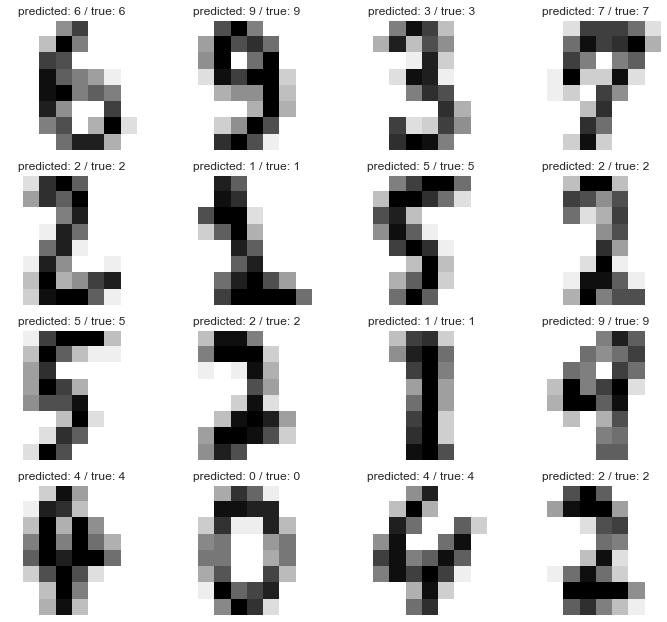

In [99]:
# Import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Assign the predicted values to `predicted`
predicted = svc_model.predict(X_test)

# Zip together the `images_test` and `predicted` values in `images_and_predictions`
images_and_predictions = list(zip(images_test, predicted))
plt.subplots_adjust(top=1.5)

# For the first 4 elements in `images_and_predictions`
N = 16
for index, (image, prediction) in enumerate(images_and_predictions[:N]):
    # Initialize subplots in a grid of 1 by 4 at positions i+1
    nsqrt = np.ceil(np.sqrt(N))
    plt.subplot(nsqrt, nsqrt, index + 1)
    # Don't show axes
    plt.axis('off')
    # Display images in all subplots in the grid
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    # Add a title to the plot
    plt.title(f'predicted: {prediction} / true: {y_test[index]}')

# Show the plot
plt.show()

In [90]:
# Import `metrics`
from sklearn import metrics

# Print the classification report of `y_test` and `predicted`
print(metrics.classification_report(y_test, predicted))

# Print the confusion matrix
print(metrics.confusion_matrix(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        38
           3       1.00      0.96      0.98        46
           4       1.00      1.00      1.00        55
           5       0.98      1.00      0.99        59
           6       1.00      1.00      1.00        45
           7       0.98      0.98      0.98        41
           8       0.97      1.00      0.99        38
           9       0.98      0.98      0.98        48

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  1  0  0  1  0]
 [ 0  0  0  0 55  0  0  0  0  0]
 [ 0  0  0  0  0 59  0  0  0  0]
 [ 0  0  0  0  0  0 45  0  0  0]
 [ 0  0  0

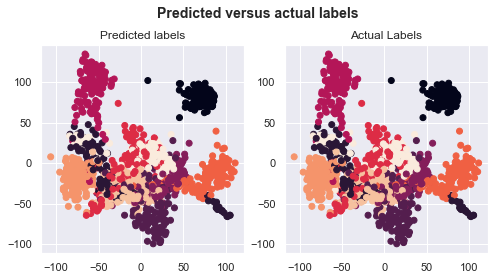

In [91]:
# Import `Isomap()`
from sklearn.manifold import Isomap

# Create an isomap and fit the `digits` data to it
X_iso = Isomap(n_neighbors=10).fit_transform(X_train)

# Compute cluster centers and predict cluster index for each sample
predicted = svc_model.predict(X_train)

# Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Adjust the layout
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots 
ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=predicted)
ax[0].set_title('Predicted labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=y_train)
ax[1].set_title('Actual Labels')


# Add title
fig.suptitle('Predicted versus actual labels', fontsize=14, fontweight='bold')

# Show the plot
plt.show()

## Ventas-Ganancias-Pérdidas
Vamos usar el dataset "Ventas-Ganancias-Pérdidas" de IBM Watson que tiene los datos de ventas de repuestos de automóviles.

In [101]:
sales_data = pd.read_csv("WA_Fn-UseC_-Sales-Win-Loss.csv")
sales_data.head(10)

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,Exterior Accessories,Car Accessories,Northwest,Fields Sales,76,Won,13,104,101,0,5,5,0,Unknown,0.696360,0.113985,0.154215,1
1,1658010,Exterior Accessories,Car Accessories,Pacific,Reseller,63,Loss,2,163,163,0,3,5,0,Unknown,0.000000,1.000000,0.000000,1
2,1674737,Motorcycle Parts,Performance & Non-auto,Pacific,Reseller,24,Won,7,82,82,7750,1,1,0,Unknown,1.000000,0.000000,0.000000,1
3,1675224,Shelters & RV,Performance & Non-auto,Midwest,Reseller,16,Loss,5,124,124,0,1,1,0,Known,1.000000,0.000000,0.000000,1
4,1689785,Exterior Accessories,Car Accessories,Pacific,Reseller,69,Loss,11,91,13,69756,1,1,0,Unknown,0.000000,0.141125,0.000000,4
5,1692390,Shelters & RV,Performance & Non-auto,Pacific,Reseller,89,Loss,3,114,0,232522,5,1,0,Unknown,0.000000,0.000877,0.000000,5
6,1935837,Garage & Car Care,Car Accessories,Pacific,Fields Sales,111,Won,12,112,112,20001,4,5,0,Unknown,0.308863,0.568487,0.122650,2
7,1952571,Exterior Accessories,Car Accessories,Pacific,Fields Sales,82,Loss,6,70,70,450000,1,1,0,Known,0.263610,0.736390,0.000000,6
8,1999486,Batteries & Accessories,Car Accessories,Northwest,Fields Sales,68,Loss,8,156,156,250000,1,5,0,None,0.000000,0.562821,0.437179,6
9,2052337,Exterior Accessories,Car Accessories,Pacific,Reseller,18,Loss,7,50,50,55003,1,1,0,Unknown,0.000000,0.585317,0.414683,4


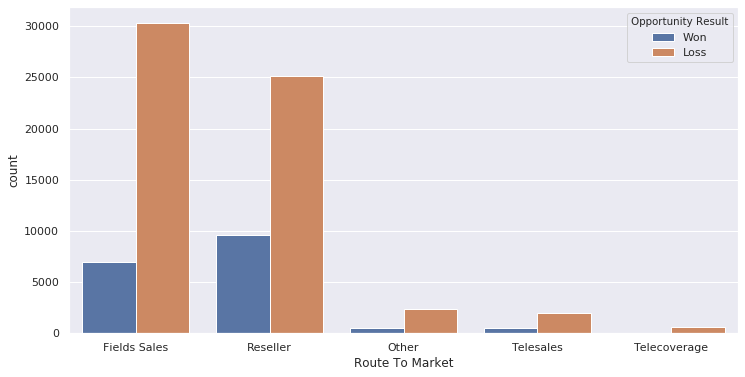

In [30]:
sns.countplot('Route To Market',data=sales_data,hue = 'Opportunity Result')

Que tipo de datos tenemos?

In [6]:
sales_data.dtypes

Opportunity Number                           int64
Supplies Subgroup                           object
Supplies Group                              object
Region                                      object
Route To Market                             object
Elapsed Days In Sales Stage                  int64
Opportunity Result                          object
Sales Stage Change Count                     int64
Total Days Identified Through Closing        int64
Total Days Identified Through Qualified      int64
Opportunity Amount USD                       int64
Client Size By Revenue                       int64
Client Size By Employee Count                int64
Revenue From Client Past Two Years           int64
Competitor Type                             object
Ratio Days Identified To Total Days        float64
Ratio Days Validated To Total Days         float64
Ratio Days Qualified To Total Days         float64
Deal Size Category                           int64
dtype: object

In [2]:
le = preprocessing.LabelEncoder()
encoded_value = le.fit_transform(["paris", "paris", "tokyo", "amsterdam"])
print(encoded_value)

[1 1 2 0]


In [32]:
print("Supplies Subgroup:", sales_data['Supplies Subgroup'].unique())
print("\nRegion:", sales_data['Region'].unique())
print("\nRoute To Market:", sales_data['Route To Market'].unique())
print("\nOpportunity Result:", sales_data['Opportunity Result'].unique())
print("\nCompetitor Type:", sales_data['Competitor Type'].unique())
print("\nSupplies Group:", sales_data['Supplies Group'].unique())

Supplies Subgroup: ['Exterior Accessories' 'Motorcycle Parts' 'Shelters & RV'
 'Garage & Car Care' 'Batteries & Accessories' 'Performance Parts'
 'Towing & Hitches' 'Replacement Parts' 'Tires & Wheels'
 'Interior Accessories' 'Car Electronics']

Region: ['Northwest' 'Pacific' 'Midwest' 'Southwest' 'Mid-Atlantic' 'Northeast'
 'Southeast']

Route To Market: ['Fields Sales' 'Reseller' 'Other' 'Telesales' 'Telecoverage']

Opportunity Result: ['Won' 'Loss']

Competitor Type: ['Unknown' 'Known' 'None']

Supplies Group: ['Car Accessories' 'Performance & Non-auto' 'Tires & Wheels'
 'Car Electronics']


Convertemos nuestros datos hasta numéricos:

In [82]:
le = preprocessing.LabelEncoder()

sales_data['Supplies Subgroup'] = le.fit_transform(sales_data['Supplies Subgroup'])
sales_data['Region'] = le.fit_transform(sales_data['Region'])
sales_data['Opportunity Result'] = le.fit_transform(sales_data['Opportunity Result'])
sales_data['Competitor Type'] = le.fit_transform(sales_data['Competitor Type'])
sales_data['Supplies Group'] = le.fit_transform(sales_data['Supplies Group'])

le = le.fit(sales_data['Route To Market'])
sales_data['Route To Market'] = le.transform(sales_data['Route To Market'])

sales_data.head()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,2,0,3,0,76,1,13,104,101,0,5,5,0,2,0.69636,0.113985,0.154215,1
1,1658010,2,0,4,2,63,0,2,163,163,0,3,5,0,2,0.00000,1.000000,0.000000,1
2,1674737,5,2,4,2,24,1,7,82,82,7750,1,1,0,2,1.00000,0.000000,0.000000,1
3,1675224,8,2,1,2,16,0,5,124,124,0,1,1,0,0,1.00000,0.000000,0.000000,1
4,1689785,2,0,4,2,69,0,11,91,13,69756,1,1,0,2,0.00000,0.141125,0.000000,4


## Set de entrenar y testar

In [94]:
cols = [col for col in sales_data.columns if col not in ['Opportunity Number', 'Opportunity Result']]
data = sales_data[cols]

target = sales_data['Opportunity Result']

data.head(n=2)

,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,2,0,3,0,76,13,104,101,0,5,5,0,2,0.69636,0.113985,0.154215,1
1,2,0,4,2,63,2,163,163,0,3,5,0,2,0.00000,1.000000,0.000000,1


In [95]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(sales_data,
                                                                    target,
                                                                    test_size=0.30,
                                                                    random_state=10)

### Naive Bayes

Naive Bayes accuracy: 0.7722146274777854


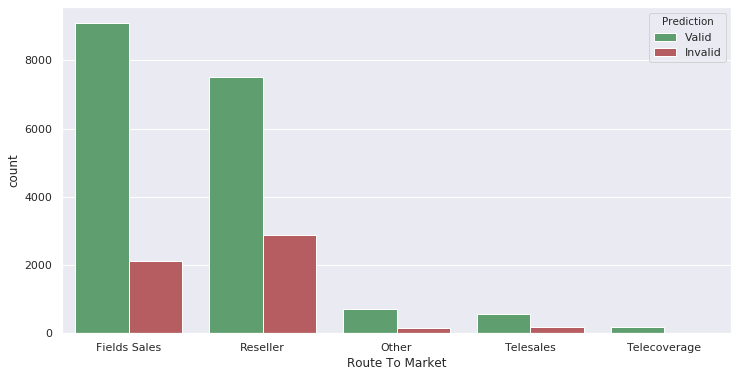

In [92]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gnb = GaussianNB()
pred = gnb.fit(data_train, target_train).predict(data_test)
print("Naive Bayes accuracy:", accuracy_score(target_test, pred, normalize=True))


data = data_test.copy()
data['Route To Market'] = le.inverse_transform(data['Route To Market'])
data['Prediction'] = ['Valid' if target_test.iloc[i] == pred[i] else 'Invalid' for i in range(len(pred))]

sns.countplot('Route To Market', data=data, hue=data['Prediction'], palette={'Valid': 'g', 'Invalid': 'r'})

### LinearSVC
![SVM](https://www.dataquest.io/wp-content/uploads/2018/06/SVM-1.png)

/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC accuracy: 0.7717874231032126


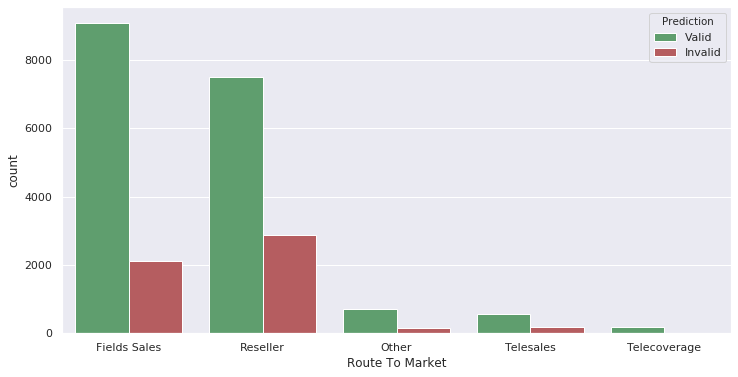

In [102]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

svc_model = LinearSVC(random_state=1)
pred = svc_model.fit(data_train, target_train).predict(data_test)
print("LinearSVC accuracy:", accuracy_score(target_test, pred, normalize=True))


data = data_test.copy()
data['Route To Market'] = le.inverse_transform(data['Route To Market'])
data['Prediction'] = ['Valid' if target_test.iloc[i] == pred[i] else 'Invalid' for i in range(len(pred))]

sns.countplot('Route To Market', data=data, hue=data['Prediction'], palette={'Valid': 'g', 'Invalid': 'r'})

### K-Neighbours

KNeighbors accuracy score: 0.7651657552973342


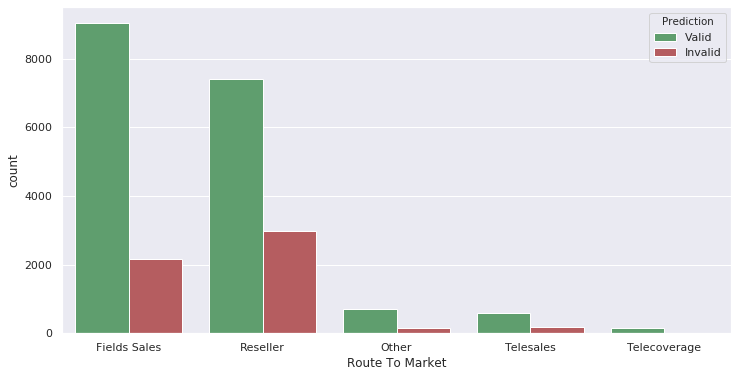

In [106]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(data_train, target_train)
pred = neigh.predict(data_test)
print ("KNeighbors accuracy score:", accuracy_score(target_test, pred))


data = data_test.copy()
data['Route To Market'] = le.inverse_transform(data['Route To Market'])
data['Prediction'] = ['Valid' if target_test.iloc[i] == pred[i] else 'Invalid' for i in range(len(pred))]

sns.countplot('Route To Market', data=data, hue=data['Prediction'], palette={'Valid': 'g', 'Invalid': 'r'})

## Performance comparison

Install with `conda install -c districtdatalabs yellowbrick`

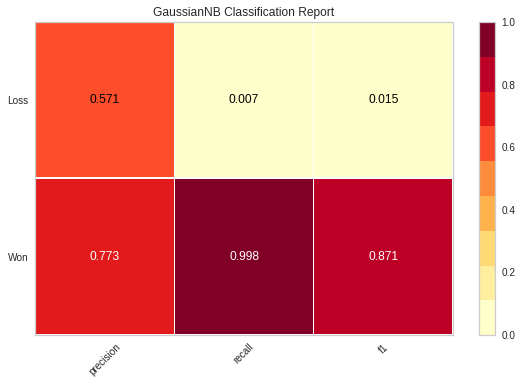

In [110]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(gnb, classes=['Won','Loss'])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof()

/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


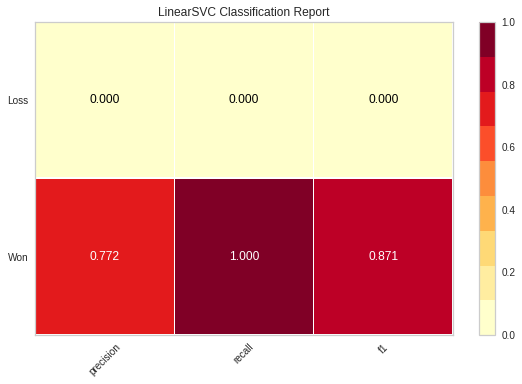

In [111]:
visualizer = ClassificationReport(svc_model, classes=['Won','Loss'])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof()

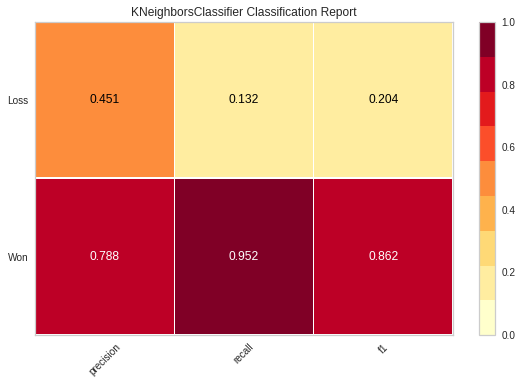

In [112]:
visualizer = ClassificationReport(neigh, classes=['Won','Loss'])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof()